In [8]:
import networkx as nx
import matplotlib.pyplot as plt

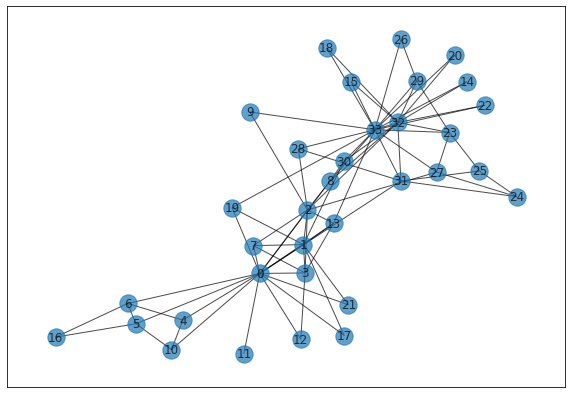

In [9]:
plt.figure(figsize=(10,7))
K = nx.karate_club_graph()
nx.draw_networkx(K, alpha=0.7)

# Identifying "important" nodes

In a friendship network:
- Degree = number of friends
- Proximity to other nodes
- Nodes that connect other nodes (lie on the shortest path)

RL examples:
- Hubs in a transportation network
- Influential users on a Social Network
- Important pages on the web

### Degree Centrality
Nodes that have many neighbors are the most important

Degree centrality of undirected netwrks: Cdeg(v) = degree(v)/|N|-1  (C=1 connected to every other node) 
* `nx.degree_centrality` for undirected graphs
* `nx.in_degree_centrality` and `nx.in_degree_centrality` for directed graphs

In [12]:
nx.degree_centrality(K)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

### Closeness centrality

Nodes that are close to other nodes are the most important

Closeness centrality of a node Cclose(v) = |N|-1/Sum(dist(v, u))  `nx.closeness_centrality`

For disconnected nodes: either consider only the nodes that the node can reach (and normalize by that) or we normalize by the number of the nodes in the graphs (`normalized=False or false`)

In [14]:
nx.closeness_centrality(K)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

### Betweenness centrality

Important nodes connect other nodes (lie on the shortest path between them)

Cbtw(v) = Sum over s,t short_paths_containing(v, s, t)/all_shortest_paths(s, t)

It is useful to normalize this centrality by dividing by all possible paths ((N - 1)(N - 2) (and then /2 if undirected)

In [17]:
nx.betweenness_centrality(K, normalized=True, endpoints=True)

{0: 0.4707155589508531,
 1: 0.1095874713521772,
 2: 0.19402993520640582,
 3: 0.07003225532637297,
 4: 0.059417706476530004,
 5: 0.08704693998811645,
 6: 0.08704693998811644,
 7: 0.058823529411764705,
 8: 0.111460543813485,
 9: 0.05962142432730668,
 10: 0.05941770647653,
 11: 0.058823529411764705,
 12: 0.058823529411764705,
 13: 0.10198907845966672,
 14: 0.058823529411764705,
 15: 0.058823529411764705,
 16: 0.058823529411764705,
 17: 0.058823529411764705,
 18: 0.058823529411764705,
 19: 0.08938828056475116,
 20: 0.058823529411764705,
 21: 0.058823529411764705,
 22: 0.058823529411764705,
 23: 0.07540106951871657,
 24: 0.06090314913844326,
 25: 0.06243810655575361,
 26: 0.058823529411764705,
 27: 0.07984325043148571,
 28: 0.06051268992445463,
 29: 0.06157372039724981,
 30: 0.07238774297597828,
 31: 0.18896528308293015,
 32: 0.19552669552669552,
 33: 0.34501174207056556}

<div class="alert alert-info">
Betweenness centrality can be expensive to compute if the graph has too many nodes, thus it can be approximated by smapling some subset of nodes and computing the score
</div>

In [18]:
nx.betweenness_centrality(K, normalized=True, endpoints=True, k=10)

{0: 0.3336435786435786,
 1: 0.184992784992785,
 2: 0.20998556998556994,
 3: 0.13703463203463204,
 4: 0.030303030303030297,
 5: 0.04545454545454545,
 6: 0.04545454545454545,
 7: 0.12727272727272726,
 8: 0.14977633477633476,
 9: 0.030721500721500716,
 10: 0.030303030303030297,
 11: 0.030303030303030297,
 12: 0.030303030303030297,
 13: 0.15126984126984125,
 14: 0.030303030303030297,
 15: 0.030303030303030297,
 16: 0.030303030303030297,
 17: 0.030303030303030297,
 18: 0.030303030303030297,
 19: 0.0373015873015873,
 20: 0.030303030303030297,
 21: 0.030303030303030297,
 22: 0.030303030303030297,
 23: 0.04181818181818182,
 24: 0.1318181818181818,
 25: 0.03343434343434343,
 26: 0.030303030303030297,
 27: 0.16415584415584414,
 28: 0.03173160173160173,
 29: 0.03202020202020202,
 30: 0.14425685425685425,
 31: 0.2302669552669553,
 32: 0.2159740259740259,
 33: 0.2458585858585858}

Sometimes it can be interesting to see the betweenness centrality of nodes based on how they connect two subsets of source and target nodes, thus the pair s, t is always selected from the two subsets (respectively)

In [25]:
nx.betweenness_centrality_subset(K, [33, 31, 21], [1, 4, 11])

{0: 3.5,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.25,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.41666666666666663,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.41666666666666663,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.16666666666666666,
 31: 0.25,
 32: 0.0,
 33: 0.0}

### Edge Betweenness centrality
The same can be done with edges, where we study if a particular edge contributs to connecting many nodes

In [29]:
sorted(nx.edge_betweenness_centrality(K).items(), key=lambda x: -x[1])[:10]

[((0, 31), 0.1272599949070537),
 ((0, 6), 0.07813428401663695),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014),
 ((2, 32), 0.06898678663384543),
 ((13, 33), 0.06782389723566191),
 ((19, 33), 0.05938233879410351),
 ((0, 11), 0.058823529411764705),
 ((26, 33), 0.0542908072319837)]

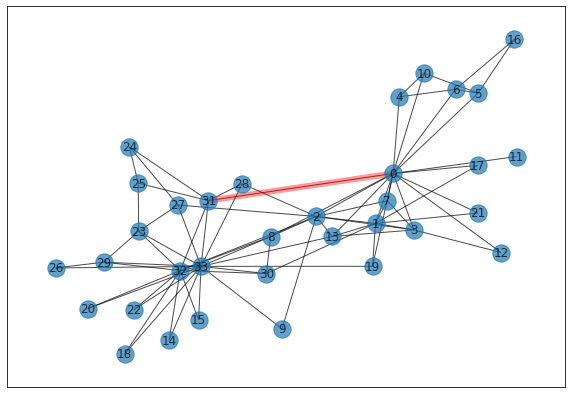

In [32]:
plt.figure(figsize=(10,7))
pos = nx.spring_layout(K)
nx.draw_networkx(K, pos, alpha=0.7)
nx.draw_networkx_edges(K, pos, edgelist=[(0, 31)], edge_color='r', alpha=0.4, width=6)

# PageRank

Score importance to the nodes with many inlinks from important nodes (works better for networks with directed edges) = recursive relation

Simple version of the algorithm:
1. Assign all nodes a PageRank of 1/n
2. Repeat K times: each node gives equal share of its current pagerank to all nodes it links to
3. You can stop when the values stop changing a lot (convergence) = PageRank

== At step K, the pagerank of a node is the probability that a random walker lands (pick a node and follow an outgoing edge k times) on *that node* after taking k steps
=> because of this, if you have a absorbant node or cycles, the nodes within it will probably have high pagerank scores, and the rest won't. So we add a "damping parameter" \alpha

Scaled version (with damping):
1. Assing all nodes a PageRank of 1/n
2. With probability \alpha, choose an outgoing edge and follow it to the next node. With probablity 1-\alpha, choose a node at random and go for it (usually converges with big K)

<div class="alert alert-info"> \alpha is usually picked between 0.8 and 0.9, and it works better for (very) large network</div>

In [35]:
sorted(nx.pagerank(K, alpha=0.8).items(), key=lambda x: -x[1])[:10]

[(33, 0.09486047671556612),
 (0, 0.08681447719172829),
 (32, 0.07407774615757656),
 (2, 0.06022609788477227),
 (1, 0.05576990180502326),
 (31, 0.041092418400124585),
 (23, 0.04005234377538896),
 (3, 0.03670727111555245),
 (5, 0.034116513708762286),
 (13, 0.03255335020695045)]

# Hubs and authorities - HITS Algorithm

In seach engines:
Given a query to a search engine:
1. Define root: set of highly relevant web pages (e.g. pages containing the query string) = potential authorities
2. Find all pages that link to a apge in root => potential hubs
3. Base: root bodes and any nodes that link to a node in root
4. Consider all edges connected nodes in the base set

Considering the centralities only within the subset of potential hubs and authorities

HITS Algorithm:
1. Assign each node an authority and hub score of 1.
2. Apply the Authority update rule: each nodes authority score is the sum of hub scores of each node that *points to it
3. Apply the Hub update rule: each node's hub score is the sum of the authority scores of each node that *it points to*
4. Normalized Authority and hub scores (by sum of all auth/hub scores)
5. Repeat K times (usually converges with big K)

Nodes that have incoming edges from *Good Hubs* are considered *good authorities*, and nodes that have outgoinging edges to *Good Authorities* are considerd *good hubs*

In [40]:
hubs_scores, auth_scores = nx.hits(K)
print('Best hubs:', [n for n, s in sorted(hubs_scores.items(), key=lambda x: -x[1])[:5]])
print('Best authorities:', [n for n, s in sorted(auth_scores.items(), key=lambda x: -x[1])[:5]])

Best hubs: [33, 2, 32, 0, 1]
Best authorities: [33, 2, 32, 0, 1]
